In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#CV2: Imported to use OpenCV for image processing
#Numpy: Images are stored and processed as numbers. These are taken as arrays. We use NumPy to deal with arrays.
#Matplotlib: This library is used for visualization and plotting. Thus, it is imported to form the plot of images.


LOAD IMAGE

In [8]:
def fileReader(filename):
    img=cv2.imread(filename) #files in python are read in bgr format so let's convert it into rgb
    img =cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img


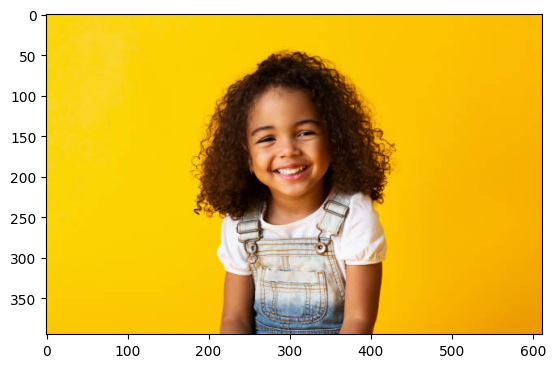

In [9]:
#Adding an image from the browser
    #as we are returning this img so we are gonna get the array of the image to remove that we are gonna fileReader function call a variable name
filename="Child.jpg"
img = fileReader(filename)
org_img=np.copy(img)

CREATE EDGE MASK

In [10]:
#now we are gonna make cartoon also egde is a pretty important thing while cartoonifying it that is we are gonna increase the edges.
# we are gonna make use of adaptve threshold in openCv library
def edge_mask(img, line_size,blur_value):
    """ 
    input: Input Image
    Oputput: Edges of Images"""
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)
    edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, line_size, blur_value)
    return edges

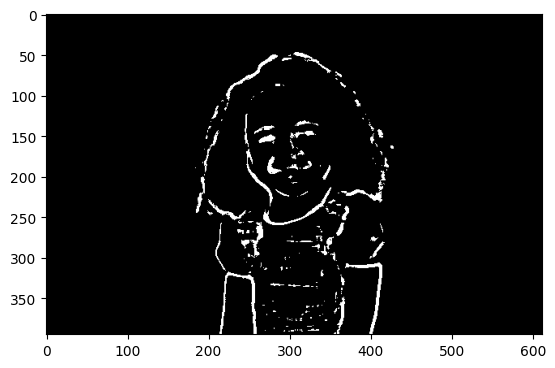

In [11]:
line_size,blur_value = 9,9
edges= edge_mask(img, line_size, blur_value)
#lets plot it
plt.imshow(edges , cmap="binary")
plt.show()

REDUCE THE COLOR PALLET

In [12]:
def colorQuantization(img, k):

    # Transform the image that is reshaping this image
    data=np.float32(img).reshape(-1,3)
    #Determine the criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20 , 0.001)
    #Implementing K-means
    ret, label ,center=cv2.kmeans(data,k, None, criteria , 10 , cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)

    result = center[label.flatten()]
    result= result.reshape(img.shape)

    return result

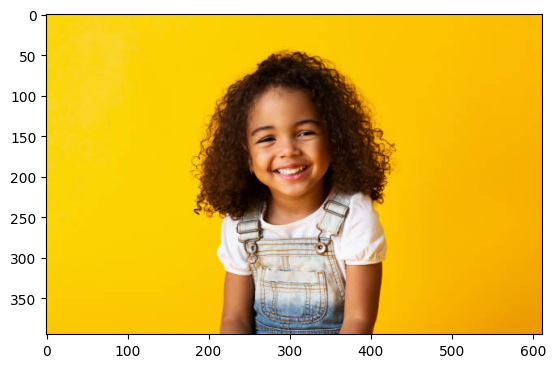

In [13]:
imgQuantiz=colorQuantization(img,k=3)
plt.imshow(img)
plt.show()

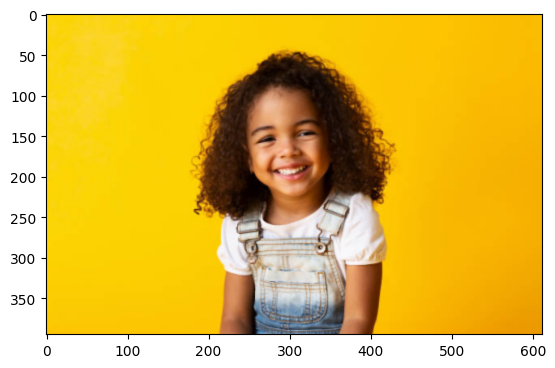

In [14]:
#Reduce the noise that is we substantially blurrred out our image
blurred=cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

COMBINE EDGE MASK WITH CONTIZE COLOR

In [15]:
def Cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)

    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()

    plt.imshow(org_img)
    plt.title("Orginal Image")
    plt.show()


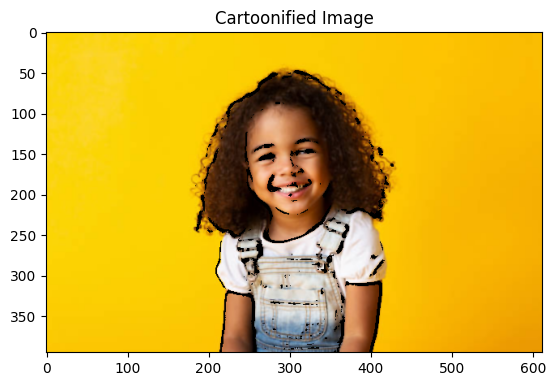

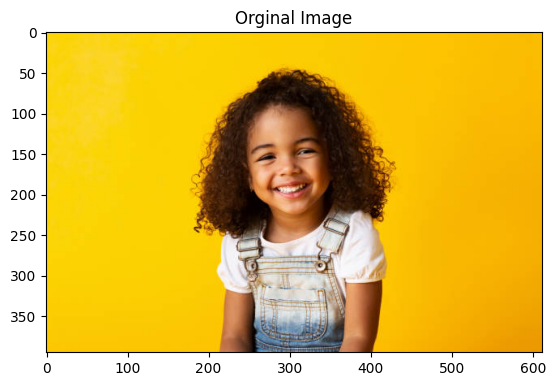

In [16]:
Cartoon()